In [2]:
!pip install upsetplot

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=upsetplot-0.9.0-py3-none-any.whl size=24866 sha256=6074132e05ff0b98601b31cfa42d3e32089b7c4ce4b1a4c3eec21df5f0f78fac
  Stored in directory: /root/.cache/pip/wheels/7b/ce/88/1d0bce5b2680165c29c3e68416325e79674d5a9f422d037996
Successfully built upsetplot


In [1]:
!pip install numpy pandas matplotlib scikit-learn

In [10]:
camembert_file  = "tous_entites_nommes_Camembert.json"
stanza_file = "tous_entites_nommes_Stanza.json"
spacy_lg_file = "tous_entites_nommes_Spacy_lg.json"
spacy_sm_file = "tous_entites_nommes_Spacy_sm.json"
#flaubert_file = "tous_entites_nommes_Flaubert_0428.json"

Lecture de Camembert ...
Lecture de Stanza ...
Lecture de Spacy_lg ...
Lecture de Spacy_sm ...

Modèles inclus : ['Camembert', 'Stanza', 'Spacy_lg', 'Spacy_sm']


/usr/local/lib/python3.11/dist-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/usr/local/lib/python3.11/dist-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/usr/local/lib/

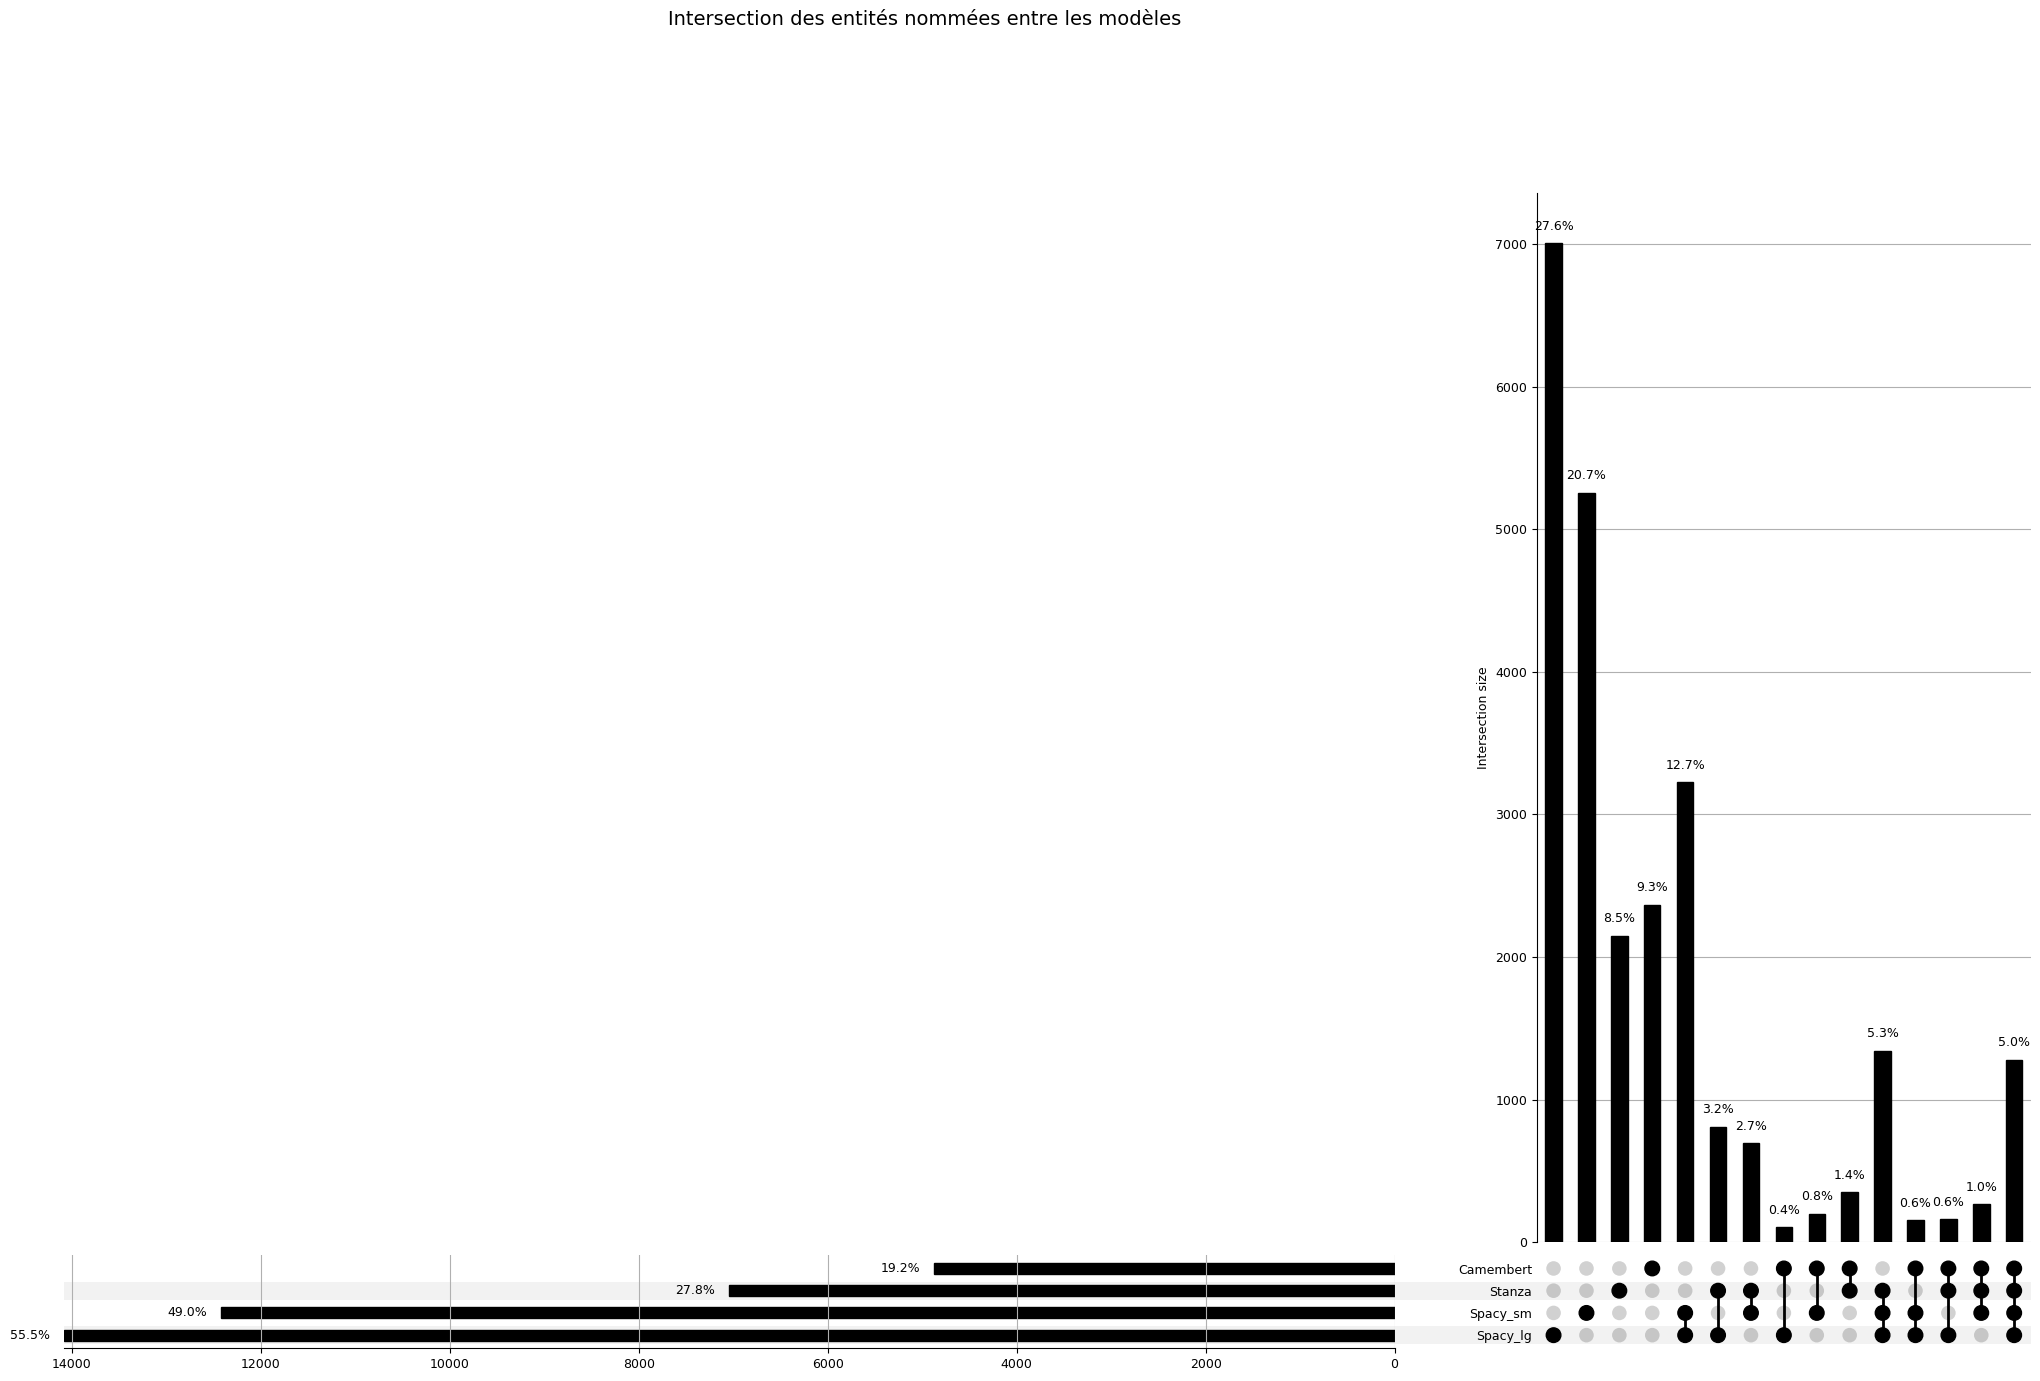

In [15]:
import json
import re
from matplotlib import pyplot as plt
from upsetplot import from_contents, UpSet

# === Fonction générale pour lire automatiquement les entités nommées, quel que soit le format JSON ===
def lire_entites_unifiees(chemin):
    import json, re

    with open(chemin, encoding='utf-8') as f:
        contenu = f.read()

    entites_extraites = []

    try:
        data = json.loads(contenu)

        if "entites" in data:  # ✅ Format Camembert / Stanza
            entites_extraites = [e["mot"] for e in data["entites"] if "mot" in e]

        elif isinstance(data, dict):  # ✅ Format SpaCy / Flaubert (documents multiples)
            for doc_data in data.values():
                # ➤ Gérer les deux formats : "entités" ou "entités nommées"
                entite_liste = (
                    doc_data.get("entités nommées")
                    or doc_data.get("entités")
                    or []
                )
                entites_extraites.extend(
                    [e.get("texte") for e in entite_liste if "texte" in e]
                )

    except json.JSONDecodeError:
        # Cas où plusieurs objets JSON sont concaténés (format brut)
        blocs = re.findall(r'\{.*?\}', contenu, re.DOTALL)
        for bloc in blocs:
            try:
                obj = json.loads(bloc)
                if "entites" in obj:
                    entites_extraites.extend([e["mot"] for e in obj["entites"] if "mot" in e])
            except Exception:
                continue

    return set(entites_extraites)


# === Dictionnaire des fichiers : associer chaque modèle à son fichier JSON ===
file_model_map = {
    "Camembert": "tous_entites_nommes_Camembert.json",
    "Stanza": "tous_entites_nommes_Stanza.json",
    "Spacy_lg": "tous_entites_nommes_Spacy_lg.json",
    "Spacy_sm": "tous_entites_nommes_Spacy_sm.json",
    #"Flaubert": "sample_data/tous_entites_nommes_Flaubert_0428.json"
}

# === Lecture des entités nommées pour tous les modèles ===
dico_fusionne = {}

for modele, chemin in file_model_map.items():
    print(f"Lecture de {modele} ...")
    dico_fusionne[modele] = lire_entites_unifiees(chemin)

print("\nModèles inclus :", list(dico_fusionne.keys()))

# === Visualisation UpSetPlot ===

# Création de la structure de données à partir du dictionnaire
test = from_contents(dico_fusionne)

# Configuration du graphique UpSet
upset = UpSet(
    test,
    orientation='horizontal',             # Affichage horizontal
    sort_by='degree',                     # Trier par nombre de modèles
    show_percentages=True,                # Afficher les pourcentages
    totals_plot_elements=40,              # Nombre de modèles affichés dans le total
    intersection_plot_elements=40,        # Nombre de combinaisons d’intersection affichées
    element_size=30                       # Taille verticale d’un élément (ligne)
)

# Taille de la figure (adaptée à 5 modèles et nombreuses intersections)
fig = plt.figure(figsize=(30, 15))
plt.subplots_adjust(
    left=0.15,    # Marge gauche pour les noms de modèles
    right=0.95,
    top=0.88,
    bottom=0.25,
    wspace=0.35,  # Espacement horizontal entre les sous-graphes
    hspace=0.25   # Espacement vertical
)

# Générer le graphique
upset.plot(fig=fig)

# Réduction de la taille de toutes les polices de caractères
for text in fig.findobj(plt.Text):
    text.set_fontsize(9)

# Titre général
plt.suptitle("Intersection des entités nommées entre les modèles", fontsize=14)

# Sauvegarde et affichage
plt.savefig("upsetplot_all_models_adjusted.png", dpi=300)
plt.show()








Lecture des entités nommées extraites par chaque modèle...
🔧 Construction de la matrice binaire modèle × entité...
Préparation des paramètres pour le diagramme de Venn...
Génération du diagramme de Venn...


/content/venn_custom.py:222: RuntimeWarning: Maximum number of iterations has been exceeded.
  res = minimize(lambda p: lossFunction(p, radii, disjointOverlaps), centers, method='Nelder-Mead', options={'maxiter': 100, 'disp': True})


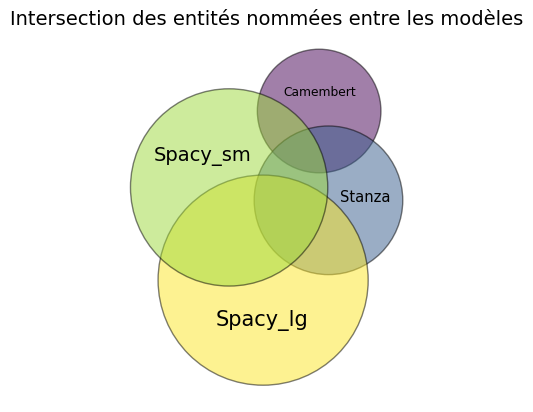

Diagramme sauvegardé sous le nom : venn_ner_models.png


In [27]:
import json
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
#from venn import df2areas, venn  #Import du module personnalisé pour Venn
from venn_custom import df2areas, venn


# === Fonction pour lire automatiquement les entités nommées à partir d’un fichier JSON ===
def lire_entites_unifiees(chemin):
    import json, re

    with open(chemin, encoding='utf-8') as f:
        contenu = f.read()

    entites_extraites = []

    try:
        data = json.loads(contenu)

        if "entites" in data:  # Format Camembert / Stanza
            entites_extraites = [e["mot"] for e in data["entites"] if "mot" in e]

        elif isinstance(data, dict):  # Format SpaCy / Flaubert (plusieurs documents)
            for doc_data in data.values():
                # ➤ Gestion des deux clés possibles : "entités" ou "entités nommées"
                entite_liste = (
                    doc_data.get("entités nommées")
                    or doc_data.get("entités")
                    or []
                )
                entites_extraites.extend(
                    [e.get("texte") for e in entite_liste if "texte" in e]
                )

    except json.JSONDecodeError:
        # Cas de fichiers JSON concaténés (non standard)
        blocs = re.findall(r'\{.*?\}', contenu, re.DOTALL)
        for bloc in blocs:
            try:
                obj = json.loads(bloc)
                if "entites" in obj:
                    entites_extraites.extend([e["mot"] for e in obj["entites"] if "mot" in e])
            except Exception:
                continue

    return set(entites_extraites)


# === Dictionnaire associant les modèles aux fichiers JSON correspondants ===
file_model_map = {
    "Camembert": "tous_entites_nommes_Camembert.json",
    "Stanza": "tous_entites_nommes_Stanza.json",
    "Spacy_lg": "tous_entites_nommes_Spacy_lg.json",
    "Spacy_sm": "tous_entites_nommes_Spacy_sm.json",
    #"Flaubert": "sample_data/tous_entites_nommes_Flaubert_0428.json"
}


# === Programme principal ===
def main():
    print("Lecture des entités nommées extraites par chaque modèle...")
    model_entities = {name: lire_entites_unifiees(path) for name, path in file_model_map.items()}

    all_entities = set.union(*model_entities.values())

    print("🔧 Construction de la matrice binaire modèle × entité...")
    data = defaultdict(dict)
    for entity in all_entities:
        for model, ents in model_entities.items():
            data[entity][model] = int(entity in ents)

    df = pd.DataFrame.from_dict(data, orient='index')

    print("Préparation des paramètres pour le diagramme de Venn...")
    labels, radii, actualOverlaps, disjointOverlaps = df2areas(df, fineTune=True)

    print("Génération du diagramme de Venn...")
    fig, ax = venn(
        radii,
        actualOverlaps,
        disjointOverlaps,
        labels=labels,
        labelsize='auto',
        cmap=None,
        fineTune=True
    )
    plt.title("Intersection des entités nommées entre les modèles", fontsize=14)
    plt.savefig("venn_ner_models.png", dpi=300, transparent=True)
    plt.show()
    print("Diagramme sauvegardé sous le nom : venn_ner_models.png")


if __name__ == "__main__":
    main()
